# Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create PATHs

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ROOT_DIR = "/content/drive/My Drive/"
HOME_DIR = ROOT_DIR + "itu/PhD/BLG 641E - Medical Image Computing/final project/"

DATA_DIR = HOME_DIR + "data/"
TRAIN_DIR = DATA_DIR + "train/"

TRAIN_IMG_DIR = TRAIN_DIR + "images/"
TRAIN_LABEL_DIR = TRAIN_DIR + "masks/"

TEMP_DIR = HOME_DIR + "code/.tmp/"
OUT_DIR = HOME_DIR + "train_npz/"

cwd = os.chdir(HOME_DIR)
!pwd

/content/drive/My Drive/itu/PhD/BLG 641E - Medical Image Computing/final project


# Write a Script for Writing Slice as a ".npz" File for Each Modalities ['t1ce', 't2', 'flair']

## For T1ce

In [3]:
# List all files in the TRAIN_IMG_DIR directory
img_files = os.listdir(TRAIN_IMG_DIR)

for img_file in img_files:
    # Extract the case number from the image filename
    case_number = img_file.split('.')[0].split('_')[1]

    # Construct the label filename based on the case number
    label_file = "mask_" + case_number + ".npy"

    # Construct the full paths for image and label files
    img_path = os.path.join(TRAIN_IMG_DIR, img_file)
    label_path = os.path.join(TRAIN_LABEL_DIR, label_file)

    # Load the image and label
    img_np = np.load(img_path)
    label_np = np.load(label_path)

    # Extract each modality
    t1ce = img_np[:, :, :, 0]
    label = np.argmax(label_np, axis=-1)

    # Save each slice as a new .npz file
    for i in range(img_np.shape[2]):
        # Construct the slice filename
        slice_filename = f"case{case_number.zfill(4)}_slice{i+1:03}.npz"

        # Create a dictionary to store the modality slice
        slice_data = {'image': t1ce[:, :, i], 'label': label[:, :, i]}

        # Save the slice as an .npz file
        np.savez(os.path.join(TEMP_DIR, slice_filename), **slice_data)


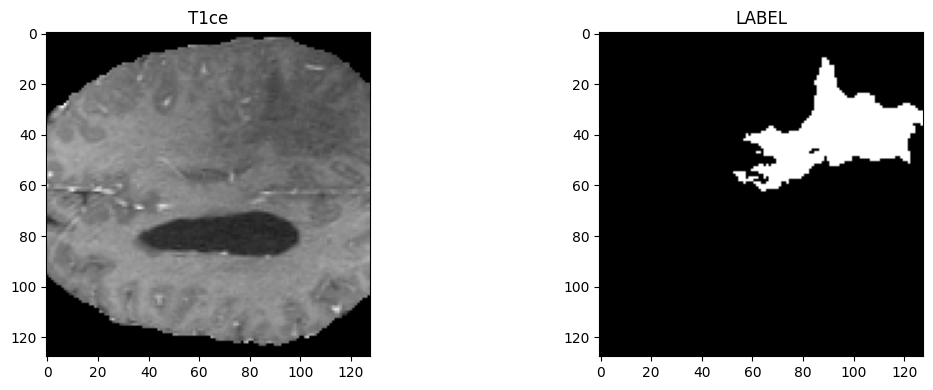

In [5]:
npz_name = "case0008_slice087.npz"

DATA_DIR_ = TEMP_DIR + npz_name

zip = np.load(DATA_DIR_)
zip.files

t1ce_ = zip['image']
label_ = zip['label']

# Create a figure and set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Display the first image
axes[0].imshow(t1ce_, cmap='gray')
axes[0].set_title('T1ce')

# Display the third image
axes[1].imshow(label_, cmap='gray')
axes[1].set_title('LABEL')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


## For T2

In [6]:
# List all files in the TRAIN_IMG_DIR directory
img_files = os.listdir(TRAIN_IMG_DIR)

for img_file in img_files:
    # Extract the case number from the image filename
    case_number = img_file.split('.')[0].split('_')[1]

    # Construct the label filename based on the case number
    label_file = "mask_" + case_number + ".npy"

    # Construct the full paths for image and label files
    img_path = os.path.join(TRAIN_IMG_DIR, img_file)
    label_path = os.path.join(TRAIN_LABEL_DIR, label_file)

    # Load the image and label
    img_np = np.load(img_path)
    label_np = np.load(label_path)

    # Extract each modality
    t2 = img_np[:, :, :, 1]
    label = np.argmax(label_np, axis=-1)

    # Save each slice as a new .npz file
    for i in range(img_np.shape[2]):
        # Construct the slice filename
        slice_filename = f"case{case_number.zfill(4)}_slice{i+1:03}.npz"

        # Create a dictionary to store the modality slice
        slice_data = {'image': t2[:, :, i], 'label': label[:, :, i]}

        # Save the slice as an .npz file
        np.savez(os.path.join(TEMP_DIR, slice_filename), **slice_data)


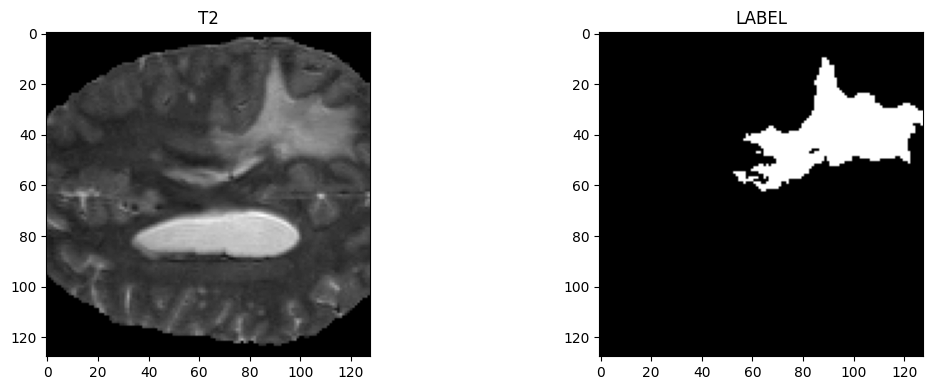

In [8]:
npz_name = "case0008_slice087.npz"

DATA_DIR_ = TEMP_DIR + npz_name

zip = np.load(DATA_DIR_)
zip.files

t2_ = zip['image']
label_ = zip['label']

# Create a figure and set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Display the first image
axes[0].imshow(t2_, cmap='gray')
axes[0].set_title('T2')

# Display the third image
axes[1].imshow(label_, cmap='gray')
axes[1].set_title('LABEL')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


## For FLAIR

In [9]:
# List all files in the TRAIN_IMG_DIR directory
img_files = os.listdir(TRAIN_IMG_DIR)

for img_file in img_files:
    # Extract the case number from the image filename
    case_number = img_file.split('.')[0].split('_')[1]

    # Construct the label filename based on the case number
    label_file = "mask_" + case_number + ".npy"

    # Construct the full paths for image and label files
    img_path = os.path.join(TRAIN_IMG_DIR, img_file)
    label_path = os.path.join(TRAIN_LABEL_DIR, label_file)

    # Load the image and label
    img_np = np.load(img_path)
    label_np = np.load(label_path)

    # Extract each modality
    flair = img_np[:, :, :, 2]
    label = np.argmax(label_np, axis=-1)

    # Save each slice as a new .npz file
    for i in range(img_np.shape[2]):
        # Construct the slice filename
        slice_filename = f"case{case_number.zfill(4)}_slice{i+1:03}.npz"

        # Create a dictionary to store the modality slice
        slice_data = {'image': flair[:, :, i], 'label': label[:, :, i]}

        # Save the slice as an .npz file
        np.savez(os.path.join(TEMP_DIR, slice_filename), **slice_data)


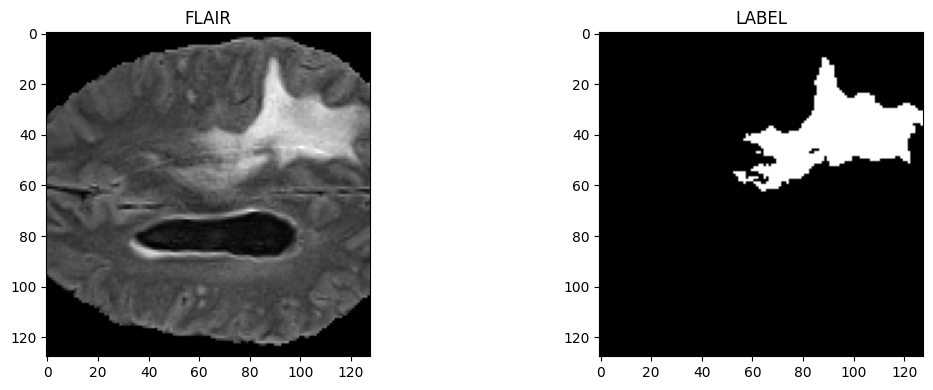

In [10]:
npz_name = "case0008_slice087.npz"

DATA_DIR_ = TEMP_DIR + npz_name

zip = np.load(DATA_DIR_)
zip.files

flair_ = zip['image']
label_ = zip['label']

# Create a figure and set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Display the first image
axes[0].imshow(flair_, cmap='gray')
axes[0].set_title('FLAIR')

# Display the third image
axes[1].imshow(label_, cmap='gray')
axes[1].set_title('LABEL')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
